In [ ]:
!pip install statsbombpy
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.4 MB/s eta 0:00:00


In [ ]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import numpy as np

#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
a  = free_comps[free_comps['competition_name']=='Ligue 1']
a = a[a["season_id"]!=27]
a

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
58,7,235,France,Ligue 1,male,False,False,2022/2023,2024-06-11T00:50:53.277411,2024-06-26T08:17:36.043856,2024-06-26T08:17:36.043856,2024-06-11T00:50:53.277411
59,7,108,France,Ligue 1,male,False,False,2021/2022,2024-06-03T16:46:00.665854,2024-06-03T16:49:55.355195,2024-06-03T16:49:55.355195,2024-06-03T16:46:00.665854


In [ ]:
free_comps = sb.competitions()
free_comps[(free_comps["competition_name"]=="Premier League") & (free_comps["season_id"]==27)]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2024-06-12T07:43:56.243851,2021-06-13T16:17:31.694,None,2024-06-12T07:43:56.243851


In [ ]:
leiscester_pl = sb.matches(competition_id=2, season_id=27)
leiscester_pl

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [ ]:
events_df = sb.events(match_id=3754141) # Arsenal VS West Ham
events_df

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Arsenal,1,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",West Ham United,40,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:24:05.973,Injury Stoppage,NaN
3560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:29:07.702,Injury Stoppage,NaN
3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:29:08.132,Injury Stoppage,NaN
3562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:24:52.579,Player Off,NaN


Index(['ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_outcome',
       'dribble_overrun', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
  

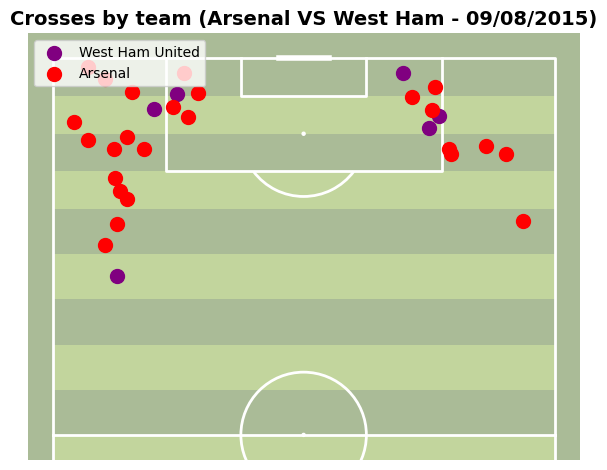

In [ ]:
print(events_df.columns)

# Assign colors for Arsenal and West Ham
team_colors = {
    'Arsenal': 'red',
    'West Ham United': 'purple'
}

# Filter for passes identified as crosses
pass_crosses = events_df[events_df['pass_cross'].notna()]

# Initialize the pitch
pitch = VerticalPitch(pitch_type='statsbomb',pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True, half=True)
fig, ax = pitch.draw()

# Plot crosses for each team
teams = pass_crosses['team'].unique()
for team in teams:
    if team in team_colors:
        color = team_colors[team]  # Use the assigned color
    else:
        color = 'gray'  # Default color if team isn't specified

    # Filter the data for the current team
    team_crosses = pass_crosses[pass_crosses['team'] == team]
    pass_start_locations = team_crosses['location'].dropna()

    for loc in pass_start_locations:
        if isinstance(loc, list) and len(loc) == 2:
            pitch.scatter(loc[0], loc[1], ax=ax, color=color, label=team, s=100)

# Add legend and title
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=10)
plt.title('Crosses by team (Arsenal VS West Ham - 09/08/2015)', fontsize=14, fontweight="bold")
plt.show()


In [ ]:
for team in events_df["team"].unique():
  a = events_df[events_df["team"]==team]
  print(f"{team}: {round(a['shot_statsbomb_xg'].sum(), 2)}xG")

Arsenal: 1.29xG
West Ham United: 0.43xG


Damn... Arsenal lost 2-0

Looking at the number of crosses is also pretty impressive. West Ham only had 6 vs Arsenal's 20+

Thats an impressive underperformance of **-1.29** versus a West Ham being much more convincing at a **+1.57** realized vs expected goals


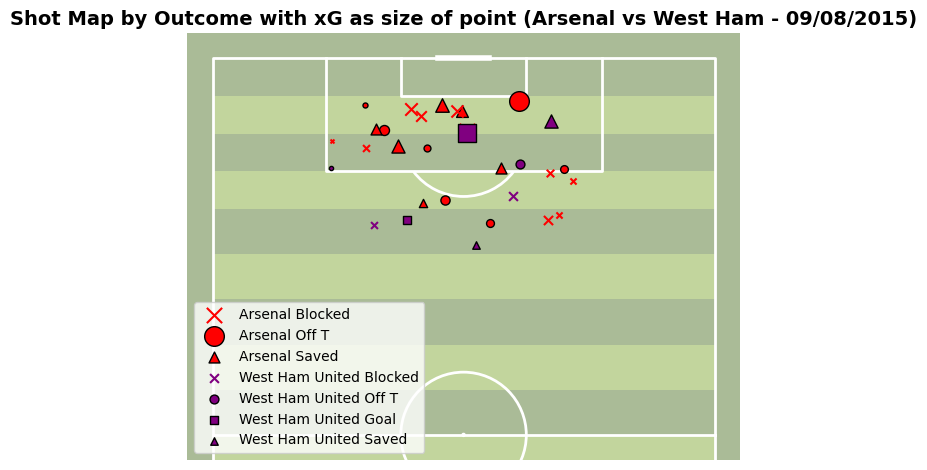

In [ ]:
# Define colors for Arsenal and West Ham
team_colors = {
    'Arsenal': 'red',
    'West Ham United': 'purple'
}

# Filter for shots
shots = events_df[events_df['type'] == 'Shot']

# Initialize the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#aabb97', line_color='white',
                      stripe_color='#c2d59d', stripe=True, half=True)
fig, ax = pitch.draw()

# Plot shots for each team
for team, color in team_colors.items():
    team_shots = shots[shots['team'] == team]
    for _, shot in team_shots.iterrows():
        loc = shot['location']
        xg = shot['shot_statsbomb_xg']
        shot_outcome = shot['shot_outcome']
        # Determine marker based on shot outcome
        if shot_outcome == 'Goal':
            marker = 's'  # Square for goals
        elif shot_outcome == 'Saved':
            marker = '^'  # Triangle for on-target
        elif shot_outcome == 'Blocked':
            marker = 'x'  # Triangle for on-target
        else:
            marker = 'o'  # Circle for off-target

        if isinstance(loc, list) and len(loc) == 2:
            pitch.scatter(loc[0], loc[1], ax=ax, color=color, edgecolor='black',
                          s=xg * 1000, label=f'{team} {shot_outcome}', marker=marker)

# Add legend and title
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique_labels.values(), unique_labels.keys(), loc='lower left', fontsize=10)
plt.title('Shot Map by Outcome with xG as size of point (Arsenal vs West Ham - 09/08/2015)', fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


In [ ]:
def get_possession(match_df: pd.DataFrame) -> list:
  # sb_event_df = sb.events(match_id=match_id)
  home = 0
  away = 0
  return [home, away]

def get_home_away_xg(match_df: pd.DataFrame) -> list:
  t = []
  for team in match_df["team"].unique():
    a = match_df[match_df["team"]==team]
    t.append(a['shot_statsbomb_xg'].sum())
  return t

In [ ]:
df = pd.DataFrame()
df["match_id"], df["home"], df["away"] = leiscester_pl["match_id"], leiscester_pl["home_team"], leiscester_pl["away_team"]

for match_id in df["match_id"]:
  print(match_id)
  match_event_df = sb.events(match_id=match_id)

  home_xg, away_xg = get_home_away_xg(match_df=match_event_df)

  print(f"home: {home_xg}, away: {away_xg}")

  df.loc[df["match_id"]==match_id, "home_xg"] = home_xg
  df.loc[df["match_id"]==match_id, "away_xg"] = away_xg

df

3754058
home: 2.822870534, away: 0.9365025570000001
3754245
home: 1.4764541943, away: 0.670350703
3754136
home: 1.085260928, away: 0.380227848
3754037
home: 0.890678305, away: 1.429666863
3754039
home: 1.142375225, away: 1.703768405
3754041
home: 2.922745433, away: 0.301121908
3754042
home: 1.6083169380000002, away: 0.5253348335
3754043
home: 1.5332255784000002, away: 0.25445065
3754045
home: 0.88816437, away: 1.6955960014999998
3754048
home: 2.66542692, away: 0.5921424275
3754049
home: 1.9985859039999998, away: 0.6380323042
3754050
home: 1.0557286609999998, away: 1.1187673422
3754052
home: 0.458485052, away: 0.697672533
3754053
home: 1.1835343155, away: 2.131559391
3754055
home: 2.4303121234, away: 0.7353494558
3754226
home: 0.535956585, away: 1.7905645047000003
3754014
home: 1.0752312229999998, away: 1.2773736449000002
3754091
home: 0.4492997149, away: 0.975737208
3754135
home: 1.5285599140000001, away: 0.4798927317
3754293
home: 0.7469116069999999, away: 0.8532972239999999
3754339
h

,match_id,home,away,home_xg,away_xg
0,3754058,Leicester City,AFC Bournemouth,2.822871,0.936503
1,3754245,West Bromwich Albion,Sunderland,1.476454,0.670351
2,3754136,Newcastle United,Aston Villa,1.085261,0.380228
3,3754037,Everton,AFC Bournemouth,0.890678,1.429667
4,3754039,Crystal Palace,Watford,1.142375,1.703768
...,...,...,...,...,...
375,3754020,Liverpool,AFC Bournemouth,1.833528,0.789176
376,3754267,Watford,West Bromwich Albion,0.900475,0.931386
377,3754141,Arsenal,West Ham United,1.291578,0.429877
378,3754128,AFC Bournemouth,Aston Villa,1.249248,0.651935


In [ ]:
leiscester_pl[leiscester_pl["match_id"] == 3754204]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
116,3754204,2015-08-29,16:00:00.000,England - Premier League,2015/2016,Aston Villa,Sunderland,2,2,available,...,2021-06-13T16:17:31.694,4,Regular Season,Villa Park,Robert Madley,Tim Sherwood,Dick Advocaat,1.1.0,2,2


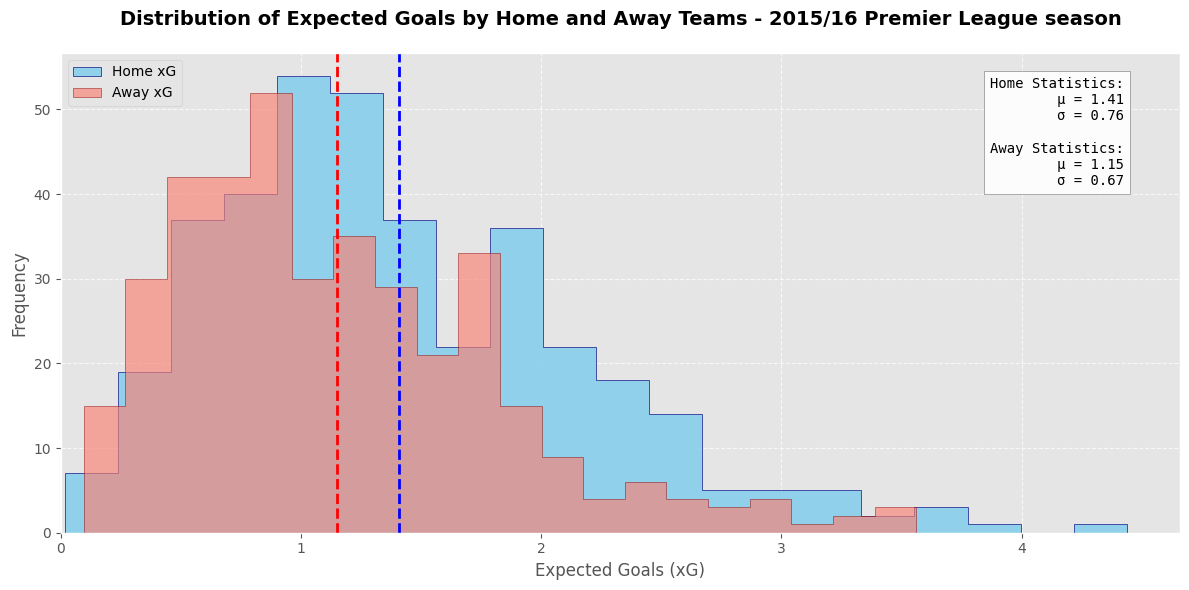

In [ ]:
# Calculate statistics
home_mean = df["home_xg"].mean()
home_std = df["home_xg"].std()
away_mean = df["away_xg"].mean()
away_std = df["away_xg"].std()

# Set style and figure size
plt.style.use('ggplot')  # Alternatives: 'bmh', 'seaborn-colorblind', 'fivethirtyeight'
plt.figure(figsize=(12, 6))

# Create histograms with custom parameters
plt.hist(df["home_xg"], bins=20, color='skyblue', edgecolor='navy',
         alpha=0.9, label='Home xG', density=False, histtype='stepfilled')
plt.hist(df["away_xg"], bins=20, color='salmon', edgecolor='darkred',
         alpha=0.65, label='Away xG', density=False, histtype='stepfilled')

# Add vertical lines for means
plt.axvline(home_mean, color='blue', linestyle='--', linewidth=2)
plt.axvline(away_mean, color='red', linestyle='--', linewidth=2)

# Create statistical annotation box
stats_text = (f'Home Statistics:\nμ = {home_mean:.2f}\nσ = {home_std:.2f}\n\n'
              f'Away Statistics:\nμ = {away_mean:.2f}\nσ = {away_std:.2f}')

plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
               fontsize=10, fontfamily='monospace',
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

# Add labels and title
plt.xlabel('Expected Goals (xG)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Expected Goals by Home and Away Teams - 2015/16 Premier League season', fontsize=14, pad=20, fontweight="bold")

# Add legend and grid
plt.legend(loc='upper left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.7)

# Set axis limits
plt.xlim(left=0)
plt.ylim(bottom=0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

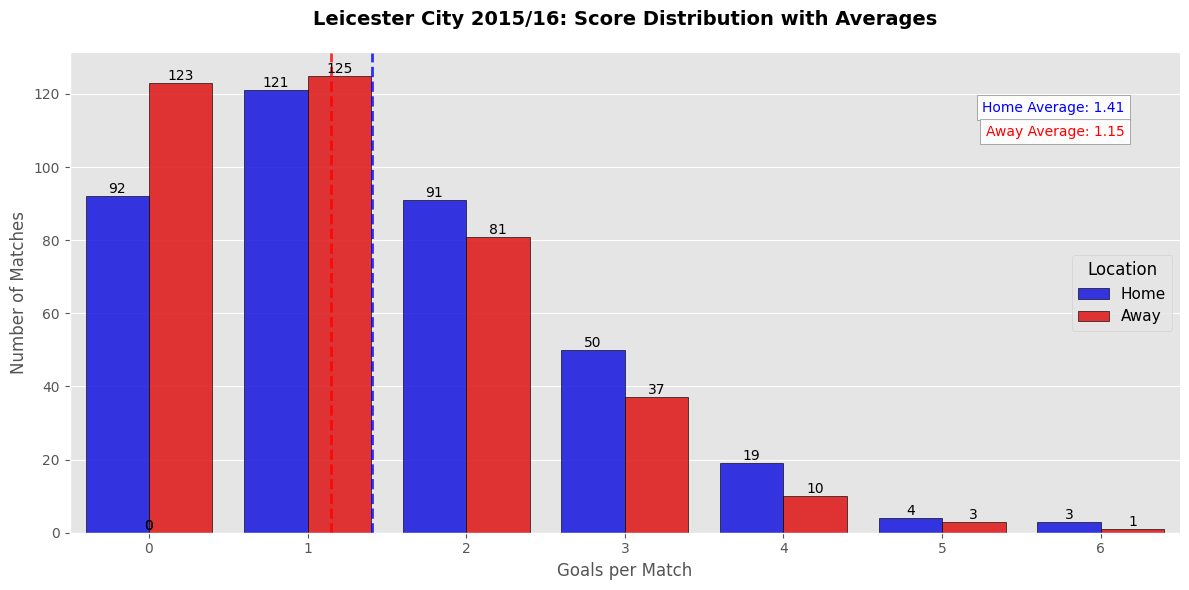

In [ ]:
# Updated colors
home_color = 'blue'
away_color = 'red'

score_df = leiscester_pl.melt(value_vars=['home_score', 'away_score'],
                             var_name='location', value_name='goals')
score_df['location'] = score_df['location'].str.replace('_score', '').str.title()

# Create plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=score_df, x='goals', hue='location',
                   palette=[home_color, away_color],
                   alpha=0.9, edgecolor='black')

# Add mean lines
plt.axvline(home_mean, color=home_color, linestyle='--', linewidth=2, alpha=0.8)
plt.axvline(away_mean, color=away_color, linestyle='--', linewidth=2, alpha=0.8)

# Add mean annotations
plt.text(0.95, 0.90, f'Home Average: {home_mean:.2f}',
         color=home_color, transform=ax.transAxes,
         ha='right', va='top', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
plt.text(0.95, 0.85, f'Away Average: {away_mean:.2f}',
         color=away_color, transform=ax.transAxes,
         ha='right', va='top', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

# Style elements
plt.title('Leicester City 2015/16: Score Distribution with Averages',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Goals per Match', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.legend(title='Location', title_fontsize=12, fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()


Good, the plots above tell us that considering two teams of same level, a team is expected to win more at home than it would on the road. The expected goal seen that season is **1.41** at home VS **1.15** when playing away from home.

This number is quite close from the realized number over a full season (1.49 home goals VS 1.21 away goals / game).

The standard deviation is also significant. There is a wider range of goals scored at home than away.

However it doesn't necessarily mean the team will at home will win more often! There will be another analysis to figure that out later.

Prob of a team not scoring (frequencist approach ignoring all other params): 92 + 123 / (380 x 2) = 215 / 760 ~ 28.3%* (24.2% at home and 32.4% if playing away)

In comparison, this year Ligue 1 (currently at matchday 22) has a much stronger home advantage with **1.61** home goals VS **0.94** away goals.

In [ ]:
teams = leiscester_pl["home_team"].unique()
matchdays = np.sort(leiscester_pl["match_week"].unique())

index = pd.MultiIndex.from_product([matchdays, teams], names=["Matchday", "Team"])
table = pd.DataFrame(index=index, columns=["Goals Scored", "Goals Conceded", "Wins", "Draws", "Losses"])
table.fillna(0, inplace=True)


for matchday in matchdays:
  print(f"\nMatchday {matchday}")
  temp = leiscester_pl[leiscester_pl["match_week"]==matchday]
  for team in temp["home_team"].unique():
    print(f"{team} res: {bool(temp.loc[temp['home_team'] == team, 'home_score'].iloc[0] > temp.loc[temp['home_team'] == team, 'away_score'].iloc[0])}")

    table.at[(matchday, team), "Goals Scored"] += int(temp.loc[temp["home_team"] == team]["home_score"])
      table.at[(matchday, team), "Goals Conceded"] += int(temp.loc[temp["home_team"] == team]["home_score"])




<ipython-input-25-f61419db9417>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table.fillna(0, inplace=True)
<ipython-input-25-f61419db9417>:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  table.at[(matchday, team), "Goals Scored"] += int(temp.loc[temp["home_team"] == team]["home_score"])
<ipython-input-25-f61419db9417>:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  table.at[(matchday, team), "Goals Conceded"] += int(temp.loc[temp["home_team"] == team]["home_score"])



Matchday 1
Newcastle United res: False
Manchester United res: True
West Bromwich Albion res: False
Leicester City res: True
Everton res: False
Norwich City res: False
Stoke City res: False
Arsenal res: False
AFC Bournemouth res: False
Chelsea res: False

Matchday 2
Sunderland res: False
Aston Villa res: False
Tottenham Hotspur res: False
Swansea City res: True
Crystal Palace res: False
West Ham United res: False
Manchester City res: True
Southampton res: False
Liverpool res: True
Watford res: False

Matchday 3
Norwich City res: False
Manchester United res: False
Everton res: False
West Ham United res: False
Crystal Palace res: True
Leicester City res: False
Watford res: False
Arsenal res: False
Sunderland res: False
West Bromwich Albion res: False

Matchday 4
Stoke City res: False
AFC Bournemouth res: False
Liverpool res: False
Chelsea res: False
Newcastle United res: False
Swansea City res: True
Aston Villa res: False
Manchester City res: True
Tottenham Hotspur res: False
Southampton

In [ ]:
table


Goals Scored  Goals Conceded  Wins  Draws  \
Matchday Team                                                              
1        Leicester City                   4               4     0      0   
         West Bromwich Albion             0               0     0      0   
         Newcastle United                 2               2     0      0   
         Everton                          2               2     0      0   
         Crystal Palace                   0               0     0      0   
...                                     ...             ...   ...    ...   
38       Norwich City                     0               0     0      0   
         Chelsea                          1               1     0      0   
         Watford                          2               2     0      0   
         Manchester City                  0               0     0      0   
         West Ham United                  0               0     0      0   

                               Losses  
Matchday Team                          
1        Leicester City             0  
         West Bromwich Albion       0  
         Newcastle United           0  
         Everton                    0  
         Crystal Palace             0  
...                               ...  
38       Norwich City               0  
         Chelsea                    0  
         Watford                    0  
         Manchester City            0  
         West Ham United            0  

[760 rows x 5 columns]

In [ ]:
import pandas as pd
import numpy as np

teams = leiscester_pl["home_team"].unique()
matchdays = np.sort(leiscester_pl["match_week"].unique())

index = pd.MultiIndex.from_product([matchdays, teams], names=["Matchday", "Team"])
table = pd.DataFrame(0, index=index, columns=["Goals Scored", "Goals Conceded", "Wins", "Draws", "Losses"])

for matchday in matchdays:
    temp = leiscester_pl[leiscester_pl["match_week"] == matchday]

    for team in temp["home_team"].unique():
        home_goals = temp.loc[temp["home_team"] == team, "home_score"].iloc[0]
        away_goals = temp.loc[temp["home_team"] == team, "away_score"].iloc[0]
        if home_goals > away_goals:
            table.at[(matchday, team), "Wins"] += 1
        elif home_goals < away_goals:
            table.at[(matchday, team), "Losses"] += 1
        elif home_goals == away_goals:
            table.at[(matchday, team), "Draws"] += 1
        table.at[(matchday, team), "Goals Scored"] = home_goals
        table.at[(matchday, team), "Goals Conceded"] = away_goals

    for team in temp["away_team"].unique():
        home_goals = temp.loc[temp["away_team"] == team, "home_score"].iloc[0]
        away_goals = temp.loc[temp["away_team"] == team, "away_score"].iloc[0]
        table.at[(matchday, team), "Goals Scored"] = away_goals
        table.at[(matchday, team), "Goals Conceded"] = home_goals
        if  away_goals > home_goals:
            table.at[(matchday, team), "Wins"] += 1
        elif home_goals > away_goals:
            table.at[(matchday, team), "Losses"] += 1
        elif home_goals == away_goals:
            table.at[(matchday, team), "Draws"] += 1

table[["Goals Scored", "Goals Conceded", "Wins", "Draws", "Losses"]] = table.groupby(level="Team").cumsum()
table["Points"] = table["Wins"] * 3 + table["Draws"]

In [ ]:
table

,level_0,index,Matchday,Team,Goals Scored,Goals Conceded,Wins,Draws,Losses,Points
0,0,0,1,Leicester City,4,2,1,0,0,3
1,1,1,1,West Bromwich Albion,0,3,0,0,1,0
2,2,2,1,Newcastle United,2,2,0,1,0,1
3,3,3,1,Everton,2,2,0,1,0,1
4,4,4,1,Crystal Palace,3,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...
755,755,755,38,Norwich City,39,67,9,7,22,34
756,756,756,38,Chelsea,59,53,12,14,12,50
757,757,757,38,Watford,40,50,12,9,17,45
758,758,758,38,Manchester City,71,41,19,9,10,66
